In [162]:
from IPython.display import Image, display
import glob
from PIL import Image
from scipy import spatial
import numpy as np

In [163]:
main_photo_path = "./images/source/Kiss.jpeg"
tile_photos_path = "./images/tiles/*"
tile_size = (8, 8)

In [164]:
tile_paths = []
for file in glob.glob(tile_photos_path):
    tile_paths.append(file)

In [165]:
tiles = []
for path in tile_paths:
    tile = Image.open(path)
    tile = tile.resize(tile_size)
    tiles.append(tile)

In [166]:
colors = []
for tile in tiles:
    mean_color = np.array(tile).mean(axis=0).mean(axis=0)
    colors.append(mean_color)

In [167]:
main_photo = Image.open(main_photo_path)

# display(main_photo)
width = int(np.round(main_photo.size[0] / tile_size[0]))
height = int(np.round(main_photo.size[1] / tile_size[1]))

resized_photo = main_photo.resize((width, height))


In [168]:
tree = spatial.KDTree(colors)

closest_tiles = np.zeros((width, height), dtype=np.uint32)

for i in range(width):
    for j in range(height):
        pixel = resized_photo.getpixel((i, j))  # Getthe pixel color at (i, j)
        closest = tree.query(pixel)             # Returns (distance, index)
        closest_tiles[i, j] = closest[1] 

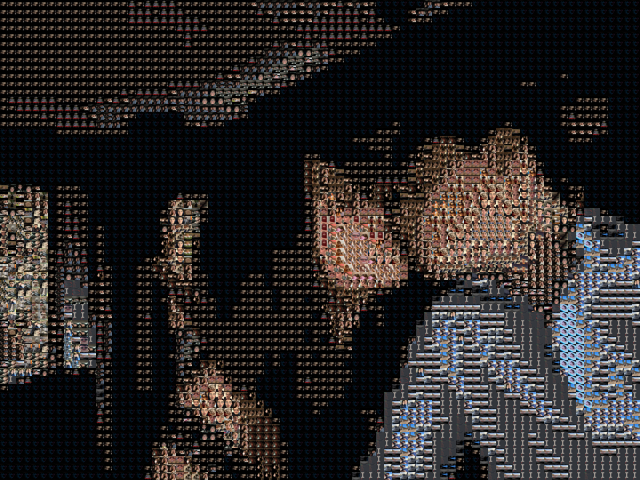

In [169]:
output = Image.new('RGB', main_photo.size)

# Draw tiles
for i in range(width):
	for j in range(height):
		# Offset of tile
		x, y = i*tile_size[0], j*tile_size[1]
		# Index of tile
		index = closest_tiles[i, j]
		# Draw tile
		output.paste(tiles[index], (x, y))
  
display(output)
output.save("./images/output/output.jpg")